<a href="https://colab.research.google.com/github/MartinGalvao/DataScience/blob/main/ProyectoDS_PartelII_%2BGalvao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final -- Martin Galvao**

# **Imports**

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import xgboost as xgb

# **Cambios al Dataset**

***Leemos el CSV para que muestre mi Dataset***

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MartinGalvao/DataScience/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***Modificacion Dataset***

In [ ]:
#Modificacion Nombre de Columnas
df = df.rename(columns={'heart_disease': 'Enfermedades Cardiacas'})
df = df.rename(columns={'hypertension': 'Hipertensión'})
df = df.rename(columns={'avg_glucose_level': 'Nivel Promedio de Glucosa en Sangre'})
df = df.rename(columns={'bmi': 'Indice de Masa Corporal'})
df = df.rename(columns={'stroke': 'Derrame Cerebral'})
df = df.rename(columns={'smoking_status': 'Estado de Fumador'})
df = df.rename(columns={'gender': 'Genero'})
df = df.rename(columns={'age': 'Edad'})
df = df.rename(columns={'ever_married': 'Casado'})
df = df.rename(columns={'work_type': 'Tipo de Trabajo'})
df = df.rename(columns={'Residence_type': 'Tipo de Residencia'})

**Se modificaron los nombres de las columnas a español para una mejor lectura**

In [ ]:
#Modificacion de valores (Se cambio de ingles a español)
df['Genero'] = df['Genero'].replace({
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otro'
})
df ['Estado de Fumador'] = df['Estado de Fumador'].replace({
    'formerly smoked': 'Anteriormente fumador',
    'never smoked': 'Nunca fumó',
    'smokes': 'Fumador',
    'Unknown': 'Desconocido'
})
df ["Tipo de Trabajo"] = df["Tipo de Trabajo"].replace({
    'Private': 'Privado',
    'Self-employed': 'Empresario',
    'children': 'Niños',
    'Govt_job': 'Gobierno',
    'Never_worked': 'Nunca trabajo'
})
df ["Tipo de Residencia"] = df["Tipo de Residencia"].replace({
    'Urban': 'Urbano',
    'Rural': 'Rural'
})
df ["Casado"] = df["Casado"].replace({
    'Yes': 'Si',
    'No': 'No'
})

**Se modificaron los valores a español para una mejor lectura**

In [ ]:
#Muestro todos los datos de mi csv

df

,id,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Casado,Tipo de Trabajo,Tipo de Residencia,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,9046,Masculino,67.0,0,1,Si,Privado,Urbano,228.69,36.6,Anteriormente fumador,1
1,51676,Femenino,61.0,0,0,Si,Empresario,Rural,202.21,NaN,Nunca fumó,1
2,31112,Masculino,80.0,0,1,Si,Privado,Rural,105.92,32.5,Nunca fumó,1
3,60182,Femenino,49.0,0,0,Si,Privado,Urbano,171.23,34.4,Fumador,1
4,1665,Femenino,79.0,1,0,Si,Empresario,Rural,174.12,24.0,Nunca fumó,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Femenino,80.0,1,0,Si,Privado,Urbano,83.75,NaN,Nunca fumó,0
5106,44873,Femenino,81.0,0,0,Si,Empresario,Urbano,125.20,40.0,Nunca fumó,0
5107,19723,Femenino,35.0,0,0,Si,Empresario,Rural,82.99,30.6,Nunca fumó,0
5108,37544,Masculino,51.0,0,0,Si,Privado,Rural,166.29,25.6,Anteriormente fumador,0


**Muestro mi Dataset modificado. Mi Dataset cuenta con 5110 filas y 12 columnas**

In [ ]:
#Elimino las columnas insignificantes
df = df.drop(columns='id')
df = df.drop(columns='Casado')
df = df.drop(columns='Tipo de Trabajo')
df = df.drop(columns="Tipo de Residencia")
df.shape

(5110, 8)

**Se elimanaron las columnas insigificantes como el id, si es casado o no, el tipo de trabajo de esa persona y su tipo de residencia. Estos mismos fueron eliminados ya que no cumplen ninguna funcion en el analisis que se quiere lograr. Luego de la eliminacion de estas columnas mi Dataset cuenta con 5110 filas y 8 columnas**


**El metodo de Feature Selection elegido para limpiar el Dataset fue el de eliminacion, ya que las caracteristicas eliminadas no eran de importancia y no generarian una modificacion en nuestros modelos.**

In [ ]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,NaN,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,NaN,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


**Descripcion de los datos de mi Dataset**


*   **Genero:** Muestra si las personas son Hombres o Mujeres.
*   **Edad:**  Muestra la edad de las personas.
*   **Hipertension:** Muestra 0 si las personas no tienen hipertension y 1 si tienen hipertension.
*   **Enfermedades Cardiacas:** Muestra 0 si las personas no tienen enfermedades cardicacas y 1 si tienen enfermedades cardiacas.
*   **Nivel Promedio de Glucosa en Sangre:** Muestra el promedio de glucosa de las personas.
*  **Indice de Masa Corporal:** Muestra el promedio de masa corporal de las personas.
*   **Estado de Fumador:** Muestra el estado del fumador
*   **Derrame Cerebral:** Muestra 0 si las personas no tienen derrames cerebrales y 1 si tienen derrames cerebrales.









In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero                               5110 non-null   object 
 1   Edad                                 5110 non-null   float64
 2   Hipertensión                         5110 non-null   int64  
 3   Enfermedades Cardiacas               5110 non-null   int64  
 4   Nivel Promedio de Glucosa en Sangre  5110 non-null   float64
 5   Indice de Masa Corporal              5110 non-null   float64
 6   Estado de Fumador                    5110 non-null   object 
 7   Derrame Cerebral                     5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


**Muestro el tipo de datos de cada columna**

***Busqueda de Valores Nulos por Columna***



In [ ]:
#Busco los datos nulos
df.isnull().sum()

,0
Genero,0
Edad,0
Hipertensión,0
Enfermedades Cardiacas,0
Nivel Promedio de Glucosa en Sangre,0
Indice de Masa Corporal,201
Estado de Fumador,0
Derrame Cerebral,0


**Vemos que en la columna de Indice de Masa Corporal hay 201 datos NaN.**

In [ ]:
# Reemplazo los valores NaN en la columna 'Indice de Masa Corporal' con la mediana
df['Indice de Masa Corporal'] = df['Indice de Masa Corporal'].fillna(df['Indice de Masa Corporal'].median())

In [ ]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,28.1,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,28.1,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


**Procedo a remplazar los valores NaN con la mediana.**

# **Outliers**

***Busqueda de Outliers***

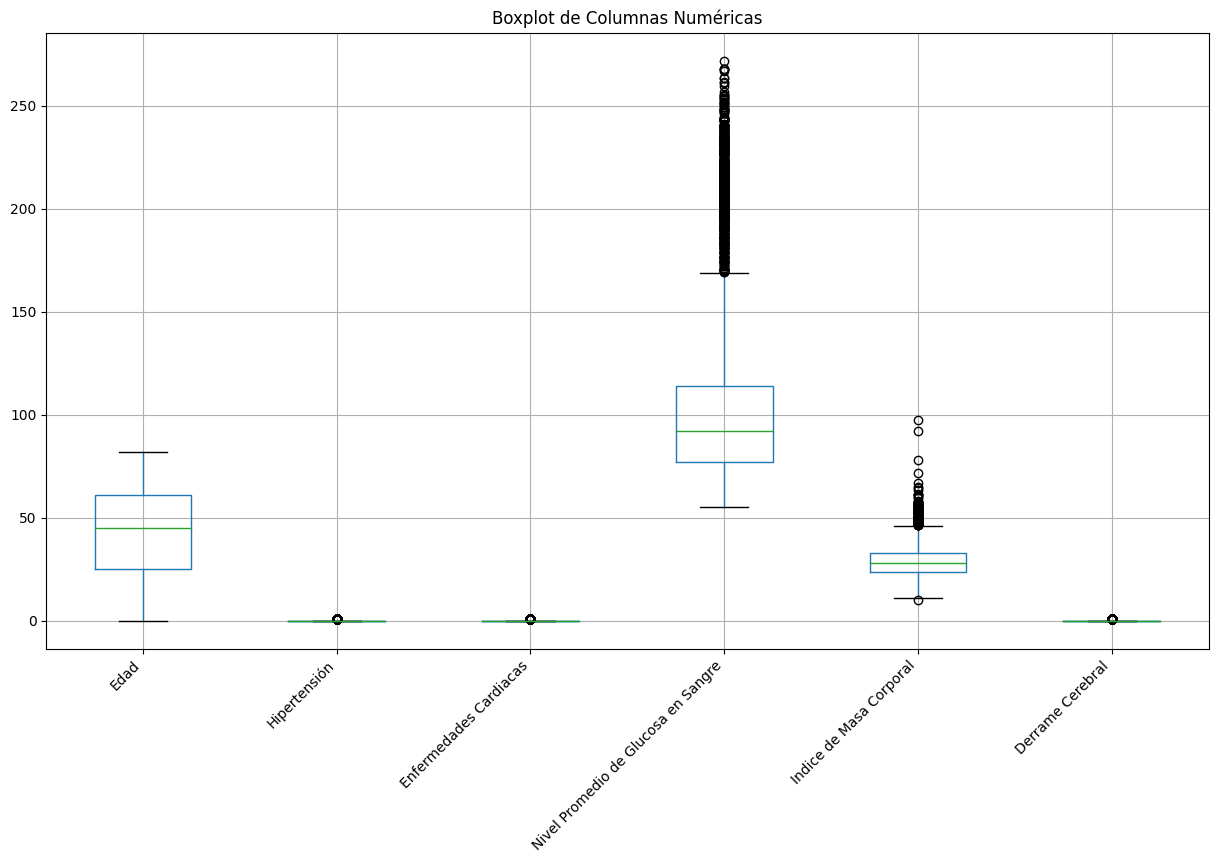

In [ ]:
# Se seleccionaron solo las columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Se creo el gráfico de boxplot
plt.figure(figsize=(15, 8))
df.boxplot(column=list(numeric_columns))
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de Columnas Numéricas')
plt.show()


**Este Boxplot fue utilizado para buscar los Outliers**

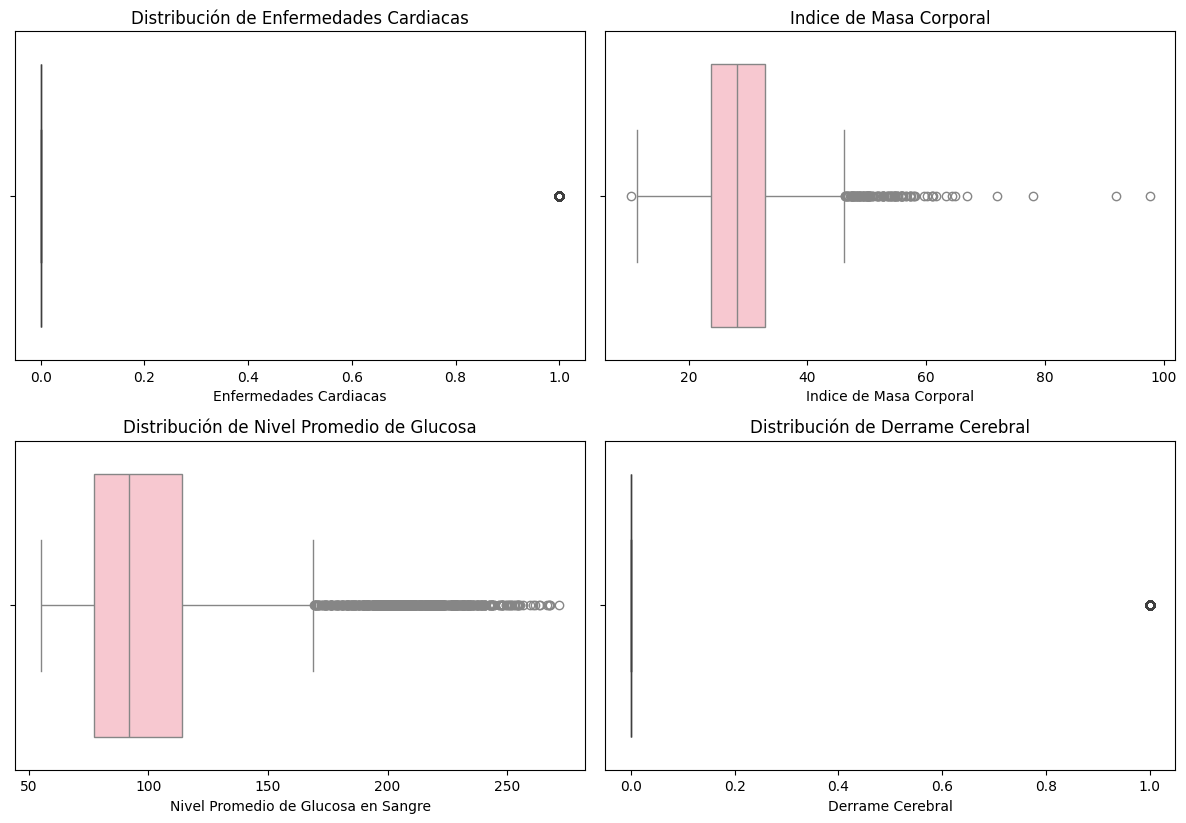

In [ ]:

# Se creo una cuadrícula 3x2 para los subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Boxplot para Enfermedades Cardiacas
sns.boxplot(x=df['Enfermedades Cardiacas'], ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Enfermedades Cardiacas')


# Boxplot para BMI
sns.boxplot(x=df['Indice de Masa Corporal'], ax=axes[0, 1], color = "pink")
axes[0, 1].set_title('Indice de Masa Corporal')
color = "ligthred"

# Boxplot para Nivel Promedio de Glucosa en Sangre
sns.boxplot(x=df['Nivel Promedio de Glucosa en Sangre'], ax=axes[1, 0], color = "pink")
axes[1, 0].set_title('Distribución de Nivel Promedio de Glucosa')

# Boxplot para Derrame Cerebral
sns.boxplot(x=df['Derrame Cerebral'], ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Derrame Cerebral')




# Se elimino los subplots vacíos
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])

# Se ajusto el diseño
plt.tight_layout()
plt.show()

**En esta cuadricula 3x2 de graficos tipo Boxplot podemos ver todos los outliers**

**Luego de visualizar los Outliers se llego a la conclusion de dejarlos ya que no tendrian que generar una modificacion en mis modelos.**

# **Graficos Genero**

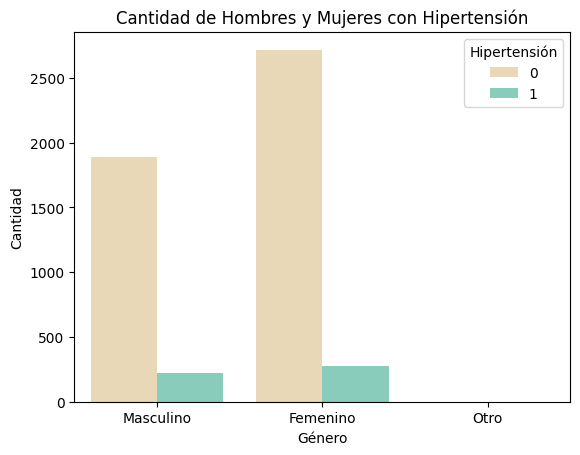

In [ ]:
#Grafico cantidad de hombres y mujeres que tienen o no Hipertensión
sns.countplot(x='Genero', hue='Hipertensión', data=df)
plt.title('Cantidad de Hombres y Mujeres con Hipertensión')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


**En este grafico vemos como ser hombre o mujer no condiciona tener o no tener Hipertensión**

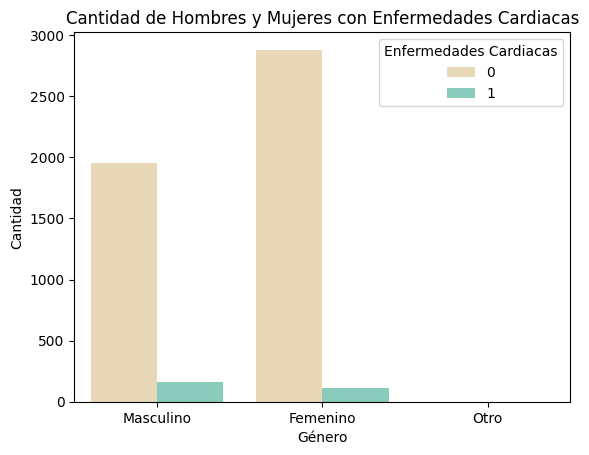

In [ ]:
#Grafico cantidad de hombres y mujeres que tienen o no Enfermedades Cardiacas
sns.countplot(x='Genero', hue='Enfermedades Cardiacas', data=df)
plt.title('Cantidad de Hombres y Mujeres con Enfermedades Cardiacas')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


**En este grafico vemos como ser hombre o mujer no condiciona tener o no tener Enfermedades Cardiacas**

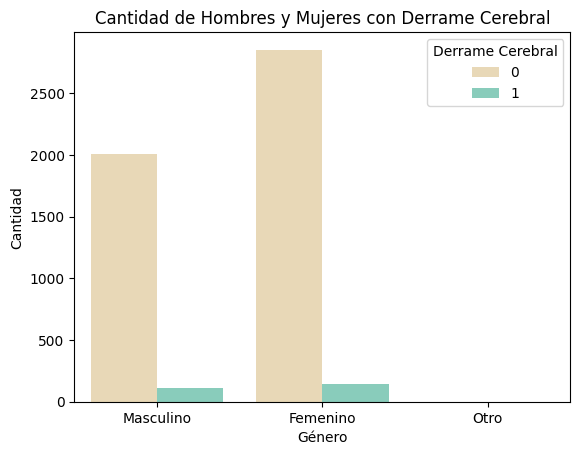

In [ ]:
#Grafico cantidad de hombres y mujeres que tienen o no Derrames Cerebrales
sns.countplot(x='Genero', hue='Derrame Cerebral', data=df)
plt.title('Cantidad de Hombres y Mujeres con Derrame Cerebral')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


**En este grafico vemos como ser hombre o mujer no condiciona tener o no tener Derrames Cerebrales**

# **Hipótesis Graficos por Estado de Fumador y Género**

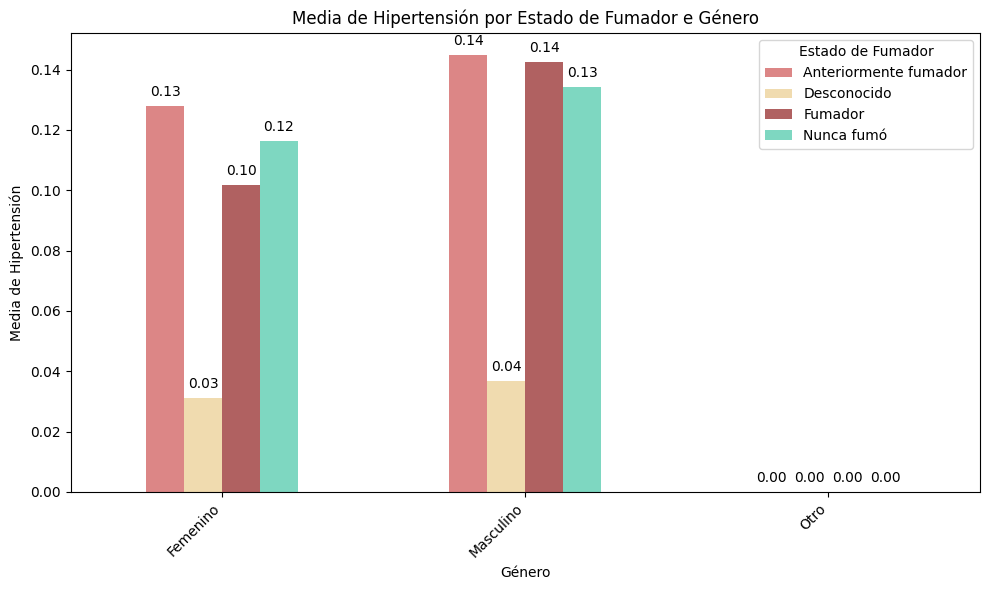

In [ ]:
#PLT

# Se agrupo por estado de fumador y género, y calcula la media de hipertensión
grouped = df.groupby(['Genero', 'Estado de Fumador'])['Hipertensión'].mean().unstack()

# Se creo el gráfico de barras
colors = {'Anteriormente fumador': '#DC8686', 'Fumador': '#B06161', "Nunca fumó" : "#7ED7C1", "Desconocido" : "#F0DBAF" }
ax = grouped.plot(kind='bar', figsize=(10, 6), color=[colors.get(col, 'gray') for col in grouped.columns])
plt.title('Media de Hipertensión por Estado de Fumador e Género')
plt.xlabel('Género')
plt.ylabel('Media de Hipertensión')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado de Fumador')
plt.tight_layout()

#Se agrego las etiquetas de datos para un mejor conprension
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'),
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
              xytext = (0, 10),
              textcoords = 'offset points')

plt.show()


**Este grafico nos ayuda a entender si ser fumador o no y si ser hombre o mujer es un condicional para tener hipertension**

In [ ]:


# Se Filtro el DataFrame para incluir solo fumadores y anteriores fumadores
fumadores = df[(df['Estado de Fumador'] == 'Fumador') | (df['Estado de Fumador'] == 'Anteriormente fumador')]

# Se Selecciono las columnas deseadas
tabla_fumadores_hipertension = fumadores[['Estado de Fumador', 'Genero', 'Hipertensión"']]

# Muestro la tabla
tabla_fumadores_hipertension

,Estado de Fumador,Genero,"Hipertensión"""
0,Anteriormente fumador,Masculino,0
3,Fumador,Femenino,0
5,Anteriormente fumador,Masculino,0
11,Fumador,Femenino,0
12,Fumador,Femenino,0
...,...,...,...
5087,Anteriormente fumador,Femenino,0
5090,Fumador,Masculino,0
5093,Fumador,Femenino,1
5099,Fumador,Masculino,0



**En esta tabla podemos ver los fumadores y anteriores fumadores, el genero y quienes tienen hipertension. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**



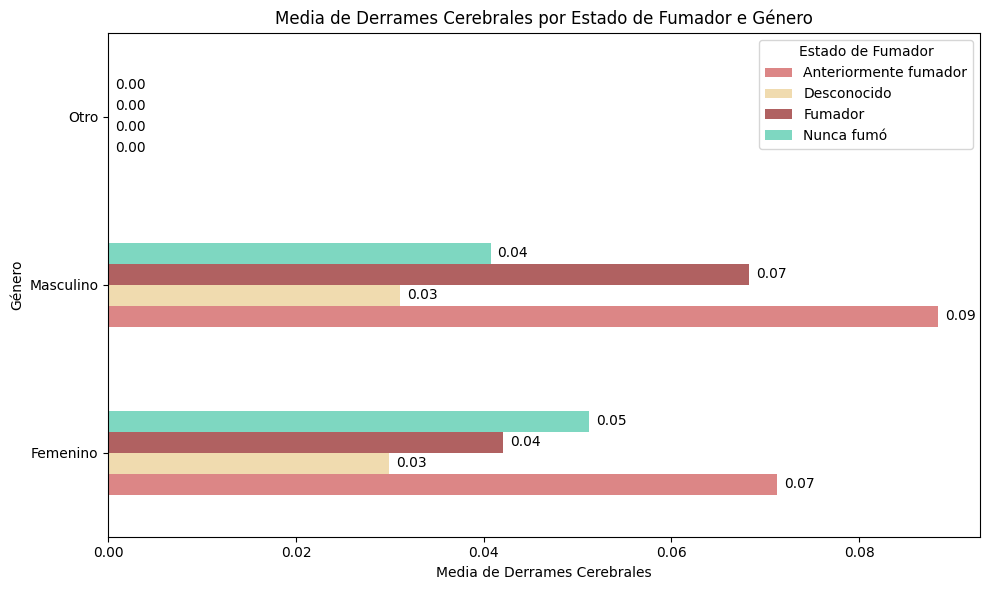

In [ ]:

# Se agrupo por género y estado de fumador, y calcula la media de derrames cerebrales
grouped = df.groupby(['Genero', 'Estado de Fumador'])['Derrame Cerebral'].mean().unstack()

# Se creo el gráfico de barras con los colores especificados
colors = {'Anteriormente fumador': '#DC8686', 'Fumador': '#B06161', "Nunca fumó" : "#7ED7C1", "Desconocido" : "#F0DBAF" }
ax = grouped.plot(kind='barh', figsize=(10, 6), color=[colors.get(col, 'gray') for col in grouped.columns])
plt.title('Media de Derrames Cerebrales por Estado de Fumador e Género')
plt.ylabel('Género')
plt.xlabel('Media de Derrames Cerebrales')
plt.yticks(rotation=0)
plt.legend(title='Estado de Fumador')
plt.tight_layout()

# Se agrego etiquetas de datos para mejor comprensión
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points')

plt.show()


**Este grafico nos ayuda a entender si ser fumador o no y si ser hombre o mujer es un condicional para tener Derrames Cerebrales**

In [ ]:


# Se Filtro el DataFrame para incluir solo fumadores y anteriores fumadores
fumadores = df[(df['Estado de Fumador'] == 'Fumador') | (df['Estado de Fumador'] == 'Anteriormente fumador')]

# Se Selecciono las columnas deseadas
tabla_fumadores_derrame_cerebral = fumadores[['Estado de Fumador', 'Genero', 'Derrame Cerebral']]

# Muestro la tabla
tabla_fumadores_derrame_cerebral

,Estado de Fumador,Genero,Derrame Cerebral
0,Anteriormente fumador,Masculino,1
3,Fumador,Femenino,1
5,Anteriormente fumador,Masculino,1
11,Fumador,Femenino,1
12,Fumador,Femenino,1
...,...,...,...
5087,Anteriormente fumador,Femenino,0
5090,Fumador,Masculino,0
5093,Fumador,Femenino,0
5099,Fumador,Masculino,0


**En esta tabla podemos ver los fumadores y anteriores fumadores, el genero y quienes tienen derrames cerebrales. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**

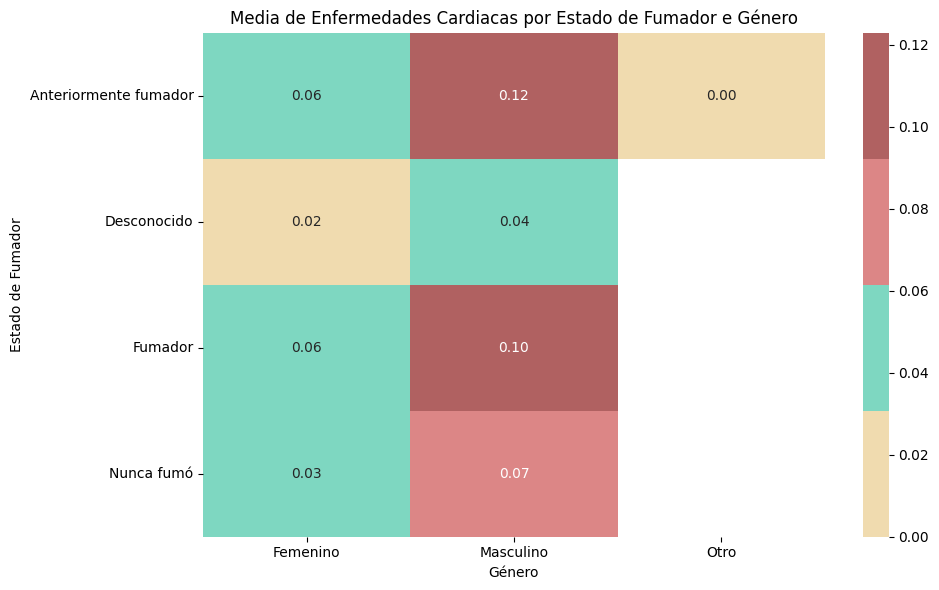

In [ ]:
#SNS

# Se agrupo por género e hipertensión, y calcula la media de enfermedades cardiacas
grouped = df.groupby(['Estado de Fumador', 'Genero'])['Enfermedades Cardiacas'].mean().unstack()

# Se creo el mapa de calor
plt.figure(figsize=(10, 6))
colors = ["#F0DBAF","#7ED7C1", '#DC8686', "#B06161"]
sns.heatmap(grouped, annot=True, cmap=colors, fmt='.2f')
plt.title('Media de Enfermedades Cardiacas por Estado de Fumador e Género')
plt.xlabel('Género')
plt.ylabel('Estado de Fumador')
plt.tight_layout()
plt.show()


**Este grafico nos ayuda a entender si ser fumador o no y si ser hombre o mujer es un condicional para tener enfermedades cardiacas**

In [ ]:


# Se Filtro el DataFrame para incluir solo fumadores y anteriores fumadores
fumadores = df[(df['Estado de Fumador'] == 'Fumador') | (df['Estado de Fumador'] == 'Anteriormente fumador')]

# Se Selecciono las columnas deseadas
tabla_fumadores_cardiacas = fumadores[['Estado de Fumador', 'Genero', 'Enfermedades Cardiacas']]

# Muestro la tabla
tabla_fumadores_cardiacas

,Estado de Fumador,Genero,Enfermedades Cardiacas
0,Anteriormente fumador,Masculino,1
3,Fumador,Femenino,0
5,Anteriormente fumador,Masculino,0
11,Fumador,Femenino,1
12,Fumador,Femenino,0
...,...,...,...
5087,Anteriormente fumador,Femenino,0
5090,Fumador,Masculino,0
5093,Fumador,Femenino,0
5099,Fumador,Masculino,0


**En esta tabla podemos ver los fumadores y anteriores fumadores, el genero y quienes tienen enfermedades cardiacas. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**

# **Hipótesis Graficos por BMI**

<ipython-input-29-5f7240a18648>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bmi_category')['Enfermedades Cardiacas'].mean().reset_index()
<ipython-input-29-5f7240a18648>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bmi_category', y='Enfermedades Cardiacas', data=grouped, palette=colors)


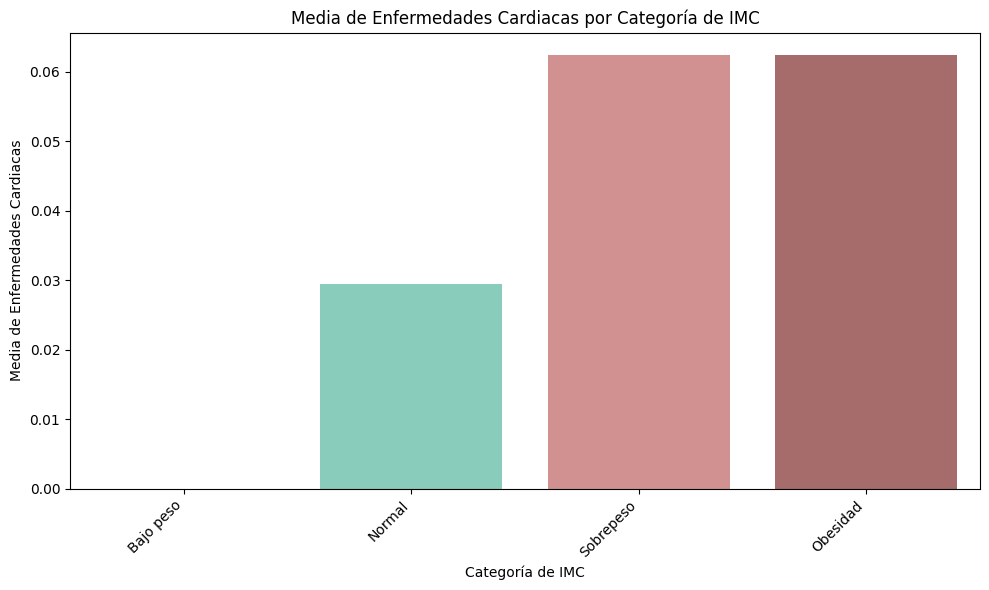

In [ ]:
#SNS

# Se calculo la media de enfermedades cardiacas por promedio de IMC
grouped = df.groupby('bmi_category')['Enfermedades Cardiacas'].mean().reset_index()

# Se creo el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
colors = ["#F0DBAF","#7ED7C1", '#DC8686', "#B06161"]
sns.barplot(x='bmi_category', y='Enfermedades Cardiacas', data=grouped, palette=colors)
plt.xlabel('Categoría de IMC')
plt.ylabel('Media de Enfermedades Cardiacas')
plt.title('Media de Enfermedades Cardiacas por Categoría de IMC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**En este grafico nos ayuda a entender si tener obesidad o no es un condicional para las Enfermedades Cardiacas**

In [ ]:

# Se selecciono las columnas deseadas
tabla_bmi_enfermedades_cardiacas = df[['Indice de Masa Corporal', 'Enfermedades Cardiacas']]

# Muestro la tabla
tabla_bmi_enfermedades_cardiacas

,Indice de Masa Corporal,Enfermedades Cardiacas
0,36.6,1
1,NaN,0
2,32.5,1
3,34.4,0
4,24.0,0
...,...,...
5105,NaN,0
5106,40.0,0
5107,30.6,0
5108,25.6,0


**En esta tabla podemos ver el indice de IMC y quienes tienen Enfermedades Cardiacas. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**


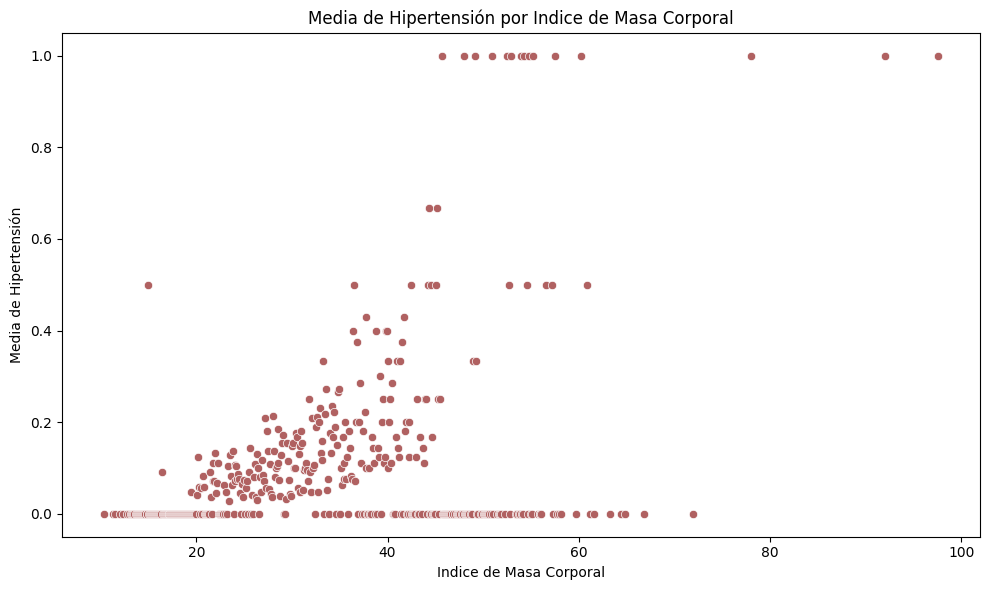

In [ ]:
#SNS
# Se calculo la media de hipertensión por promedio de IMC
grouped = df.groupby('Indice de Masa Corporal')['Hipertensión'].mean().reset_index()

# Se creo el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Indice de Masa Corporal', y='Hipertensión', data=grouped, color='#B06161')
plt.xlabel('Indice de Masa Corporal')
plt.ylabel('Media de Hipertensión')
plt.title('Media de Hipertensión por Indice de Masa Corporal')
plt.tight_layout()
plt.show()


**En este grafico nos ayuda a entender si tener obesidad o no es un condicional para la Hipertensión**

In [ ]:


# Se selecciono las columnas deseadas
tabla_bmi_hipertension = df[['Indice de Masa Corporal', 'Hipertensión']]

# Muestro la tabla
tabla_bmi_hipertension


,Indice de Masa Corporal,Hipertensión
0,36.6,0
1,NaN,0
2,32.5,0
3,34.4,0
4,24.0,1
...,...,...
5105,NaN,1
5106,40.0,0
5107,30.6,0
5108,25.6,0


**En esta tabla podemos ver el indice de IMC y quienes tienen Hipertensión. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**


<ipython-input-29-cb37502d8a68>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bmi_category')['Derrame Cerebral'].mean()


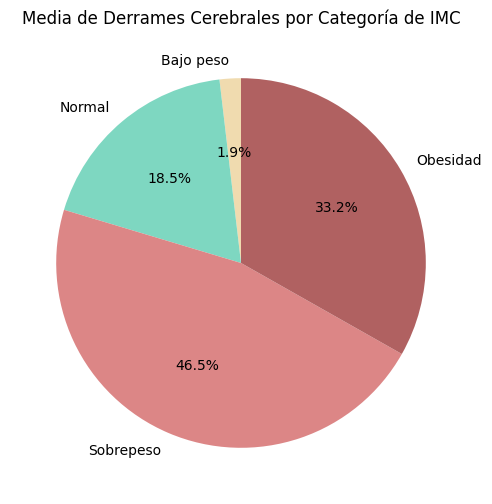

In [ ]:

# Se calculo la media de derrames cerebrales por categoría de IMC
df['bmi_category'] = pd.cut(df['Indice de Masa Corporal'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad'])
grouped = df.groupby('bmi_category')['Derrame Cerebral'].mean()

# Se creo el gráfico de torta con Seaborn
plt.figure(figsize=(8, 6))
colors = ["#F0DBAF","#7ED7C1", '#DC8686', "#B06161"]
sns.set_palette(sns.color_palette(colors))
plt.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Media de Derrames Cerebrales por Categoría de IMC')
plt.show()


**En este grafico nos ayuda a entender si tener obesidad o no es un condicional para los Derrames Cerebrales**

In [ ]:


# Se selecciono las columnas deseadas
tabla_bmi_derrame_cerebral = df[['Indice de Masa Corporal', 'Derrame Cerebral']]

# Muestro la tabla
tabla_bmi_derrame_cerebral


,Indice de Masa Corporal,Derrame Cerebral
0,36.6,1
1,28.1,1
2,32.5,1
3,34.4,1
4,24.0,1
...,...,...
5105,28.1,0
5106,40.0,0
5107,30.6,0
5108,25.6,0


**En esta tabla podemos ver el indice de IMC y quienes tienen Derrames Cerebrales. Esta tabla nos permite filtrar para encontrar los datos mas rapido. Esta tabla fue agregada para poder comparar el grafico con los datos y ver si logra ser un condicional.**

# **En base a los resultados obtenidos en los graficos se pudo observar que**

**El haber sido fumador o ex fumador es un condicional para las diferentes enfermedades.**

**El tener obesidad o sobrepeso (IMC) es un condicional para las diferentes enfermedades.**

**El genero no deberia ser un condicional para las diferentes enfermedades.**

# **Modelado**

## **Label Encoder**

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Se creo un objeto LabelEncoder
le = LabelEncoder()

# Aplio LabelEncoder a las columnas categóricas
df['Genero'] = le.fit_transform(df['Genero'])
df['Estado de Fumador'] = le.fit_transform(df['Estado de Fumador'])
df.head(10)



,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral,bmi_category
0,1,67.0,0,1,228.69,36.6,0,1,Obesidad
1,0,61.0,0,0,202.21,28.1,3,1,Sobrepeso
2,1,80.0,0,1,105.92,32.5,3,1,Obesidad
3,0,49.0,0,0,171.23,34.4,2,1,Obesidad
4,0,79.0,1,0,174.12,24.0,3,1,Normal
5,1,81.0,0,0,186.21,29.0,0,1,Sobrepeso
6,1,74.0,1,1,70.09,27.4,3,1,Sobrepeso
7,0,69.0,0,0,94.39,22.8,3,1,Normal
8,0,59.0,0,0,76.15,28.1,1,1,Sobrepeso
9,0,78.0,0,0,58.57,24.2,1,1,Normal


**La columna estado de Fumador fue reemplazada de la siguiente manera**
*  **Anterior Fumador** = 0
*   **Desconocido** = 1
*   **Nunca Fumo** = 3
*   **Fumador** = 2

**La columna genero fue reemplazada de la siguiente manera**
*   **Masculino** = 1
*   **Femenino** = 0





## **Modelo Logistic Regression**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9393346379647749
Matriz de Confusión:
 [[960   0]
 [ 62   0]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo Logist Regression es:", r2)


El R2 de el modelo Logist Regression es: 0.06458333333333366


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y) para las columnas numéricas
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Logistic Regression (MSE):", mse)


Error cuadrático medio Logistic Regression (MSE): 0.05176100206826707


## **Modelo Decision Tree**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9129158512720157
Matriz de Confusión:
 [[923  37]
 [ 52  10]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.21      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



In [ ]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo Decision Tree es:", r2)


El R2 de el modelo Decision Tree es: 0.5281922043010758


In [ ]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Decision Tree (MSE):", mse)


Error cuadrático medio Decision Tree (MSE): 0.08708414872798434


## **Modelo Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9393346379647749
Matriz de Confusión:
 [[957   3]
 [ 59   3]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.05      0.09        62

    accuracy                           0.94      1022
   macro avg       0.72      0.52      0.53      1022
weighted avg       0.92      0.94      0.92      1022



In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest para regresión
model = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R^2
r2 = r2_score(y_test, y_pred)
print("El R2 de el modelo Random Forest es:", r2)


El R2 de el modelo Random Forest es: 0.07170908938172005


In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']  # Reemplaza 'Derrame Cerebral' con el nombre de la columna numérica que quieres predecir

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest para regresión
model = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Random Forest (MSE):", mse)


Error cuadrático medio Random Forest (MSE): 0.052898727984344425


## **Modelo XGBoost**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9373776908023483
Matriz de Confusión:
 [[951   9]
 [ 55   7]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       960
           1       0.44      0.11      0.18        62

    accuracy                           0.94      1022
   macro avg       0.69      0.55      0.57      1022
weighted avg       0.91      0.94      0.92      1022



In [ ]:


# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo XGBoost es:", r2)


El R2 de el modelo XGBoost es: 0.0851142903999842


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio XGBoost (MSE):", mse)


Error cuadrático medio XGBoost (MSE): 0.06183532018164667


## **Conclusion Modelos**

**Los modelos que mejor se adaptan a mi Dataset son XGBoost y Random Forest. Sin embargo este no es bueno y se podria mejorar. Lo que considero que podria ayudar a mejorar este modelo es la inclusion de mayor cantidad de datos y ver si modificando los Outliers cambia.**


**Sin embargo podrian tratarse los datos de otra manera para intentar obtener un mejor resultado pero es poco probable lograr un resultado correcto de prediccio**n